In [1]:
!pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv("bot_testing.csv")
print(df.head())

                 bot  move  depth        time  \
0     bot_alpha_beta  b4c3      1    0.041586   
1     bot_alpha_beta  e6d5      2    0.763558   
2     bot_alpha_beta  b4c3      3   11.355647   
3     bot_alpha_beta  b4c3      4  844.246533   
4  bot_move_ordering  b4c3      1    0.215549   

                                                 fen  
0  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  
1  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  
2  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  
3  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  
4  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  


In [3]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\ufeff', '', regex=True)

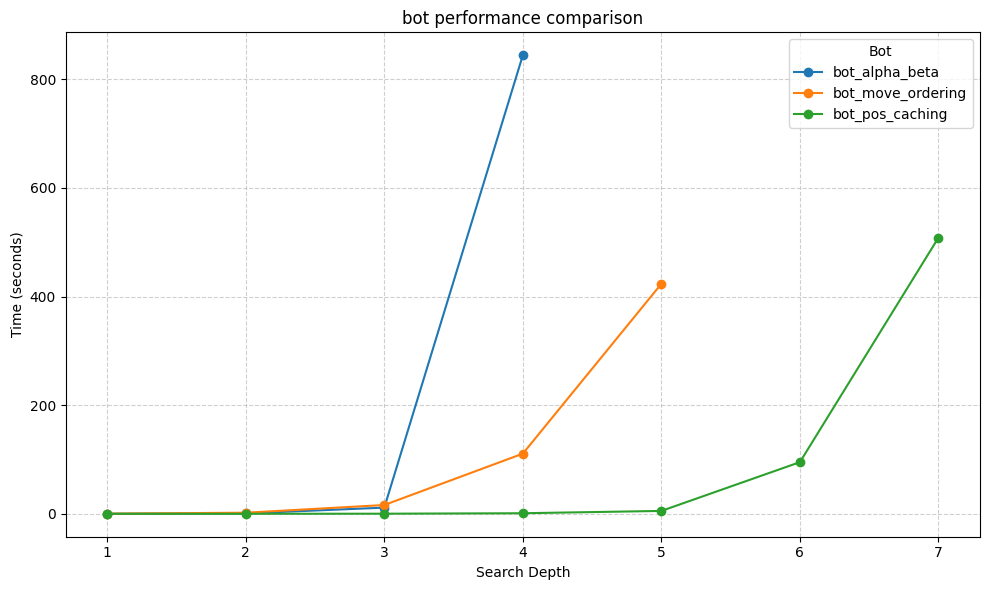

In [4]:
plt.figure(figsize=(10, 6))
for bot_name, group in df.groupby("bot"):
    plt.plot(group["depth"], group["time"], marker="o", label=bot_name)

plt.title("bot performance comparison")
plt.xlabel("Search Depth")
plt.ylabel("Time (seconds)")
plt.legend(title="Bot")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()